# Лабораторная работа №3

### Численные методы решения нелинейных уравнений и систем нелинейных уравнений

Что было сделано в рамках лабораторной работы:
- Реализованы итерационные методы решения нелинейных уравнений (Бисекции, Ньютона, простой итерации), вариационный метод (src/comp_math/nonlinear/solvers)
- Реализован метод решения нелинейной системы уравнений методом Ньютона (src/comp_math/nonlinear/solvers/iterative/newton_solver.py)
- Добавлен класс численного расчёта якобиана (src/comp_math/differentiation/numerical/numericalJacobian.py)
- Написаны тесты для проверки корректности методов (tests/test_nonlinear_solver)

In [1]:
# Необходимые импорты
import numpy as np
from comp_math.nonlinear.nonlinear_solvers_registry import NonlinearSolverRegistry
import matplotlib.pyplot as plt

1) Решение нелинейного уравнения из IV.12.3. Выбран пункт - (и)

In [2]:
# Функция
def func(x): return x**2 - np.exp(x)/5

Используемые методы

In [3]:
methods = [
    (NonlinearSolverRegistry.create_solver("bisection"), "Метод Половинного деления"),
    (NonlinearSolverRegistry.create_solver("newton1D"), "Метод Ньютона"),
    (NonlinearSolverRegistry.create_solver("fixedPoints1D"), "Метод простой итерации"),
    (NonlinearSolverRegistry.create_solver("variational"), "Метод вариационный")
]

Решим уравнене всеми методами

In [4]:
results = []

for solver, name in methods:
    x = solver.solve(func, (-1e4, 1e4), grid_points = 1000000)
    
    results.append({
        'name': name,
        'solution': x
    })

/var/folders/yp/8m035mj14pb8sd9thkrj0v_m0000gn/T/ipykernel_75754/541063495.py:2: RuntimeWarning: overflow encountered in exp
  def func(x): return x**2 - np.exp(x)/5


Посмотрим на решения 

**Замечание: методы реализованы так, что они сами находят количество корней, локализуют их, и по каждому интервалу локализации уточняют корень, поэтому на выходе имеем массив из корней)**

In [5]:
for i, result in enumerate(results):
    print(f"{result['name']} - f{result['solution'][:10]}")

Метод Половинного деления - f[np.float64(-0.3714177524354131), np.float64(0.6052671213284164), np.float64(4.707937918147184)]
Метод Ньютона - f[np.float64(-0.3714177524591739), np.float64(0.6052671213146186), np.float64(4.7079379181288585)]
Метод простой итерации - f[np.float64(-0.3715760621522515), np.float64(0.6052671212410528), np.float64(4.700004700005593)]
Метод вариационный - f[np.float64(-0.37141775241788366), np.float64(0.6052671213156069), np.float64(4.7079379180658405)]


Видно, что методы выдают одинаковые решения (что решения корректные можно убедиться запустив тесты 
(tests/test_nonlinear_solver/test_iterative_solvers.py)
(tests/test_nonlinear_solver/test_variative_solvers.py))

2) Решение нелинейной системы уравнений из IV.12.4 - (в)

Найдём графически где лежат корни

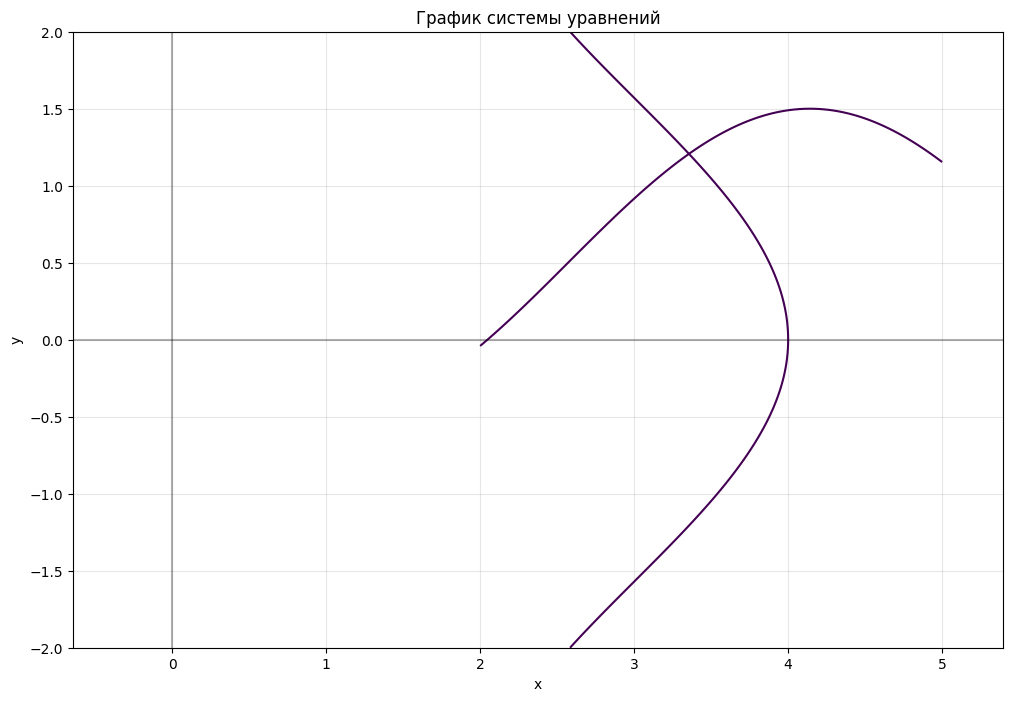

In [6]:
def system(x):
    return np.array([
        np.cos(x[0] - 1) + x[1] - 0.5,
        x[0] - np.cos(x[1]) - 3
    ])

x = np.linspace(2, 5, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

Z1 = np.cos(X - 1) + Y - 0.5
Z2 = X - np.cos(Y) - 3

plt.figure(figsize=(12, 8))

plt.contour(X, Y, Z1, levels=[0])

plt.contour(X, Y, Z2, levels=[0])

plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График системы уравнений')
plt.axis('equal')
plt.show()

In [7]:
solver = NonlinearSolverRegistry.create_solver("newtonND")

def jacobian(x):
    return np.array([
        [-np.sin(x[0] - 1), 1],
        [1, np.sin(x[1])]
    ])

solution = solver.solve(system, np.array([3.2, 1.2]), jacobian)
print(f"Решение - {solution}")

Решение - [3.35591174 1.20690682]


3) Решение нелинейной системы уравнений из IV.12.6 - (г)

In [8]:
def system(x):
    return np.array([
        np.sin(x[0]) - x[1] - 1.32,
        np.cos(x[1]) - x[0] + 0.85
    ])

График

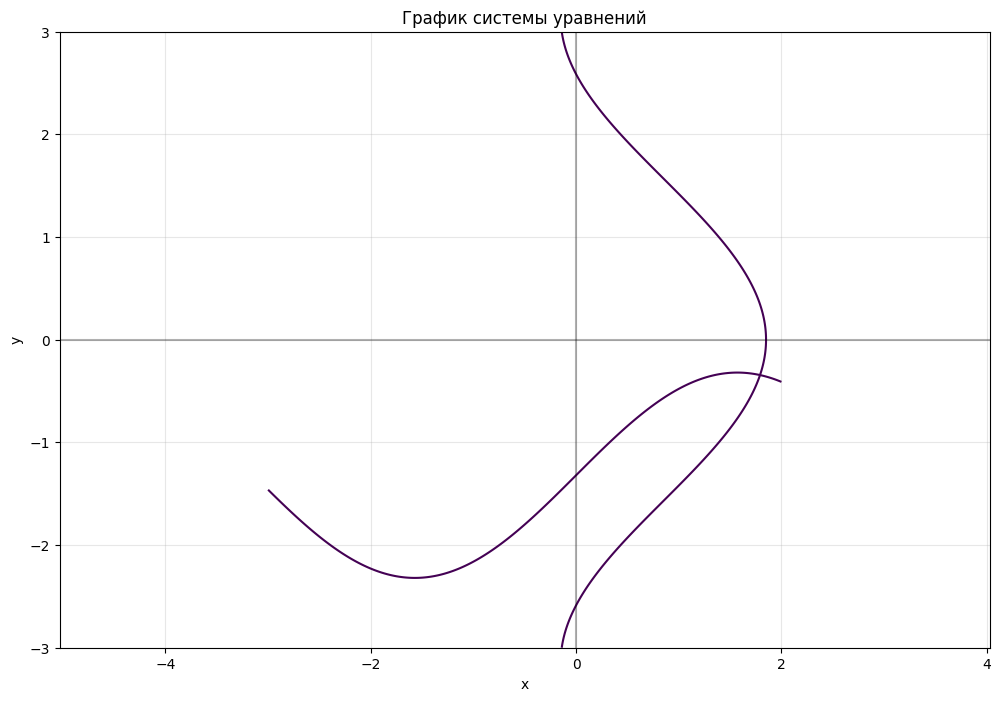

In [9]:
x = np.linspace(-3, 2, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

Z1 = np.sin(X) - Y - 1.32
Z2 = np.cos(Y) - X + 0.85 

plt.figure(figsize=(12, 8))

# Первое уравнение
plt.contour(X, Y, Z1, levels=[0])

# Второе уравнение
plt.contour(X, Y, Z2, levels=[0])

plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График системы уравнений')
plt.axis('equal')
plt.show()

Найдем корни

In [10]:
def jacobian(x):
    return np.array([
        [np.cos(x[0]), -1],
        [-1, -np.sin(x[1])]
    ])

solution = solver.solve(system, np.array([2, -0.5]), jacobian)
print(f"Решение - {solution}")

Решение - [ 1.79133861 -0.34422104]
